# Visualizing Sentiment Analysis data 

In this page, we will include all the libraries needed to create visualizations and perform descriptive and exploratory statistical analyses. 

In [1011]:
import pandas as pd # Importing the pandas library to read the csv file

import seaborn as sns # Importing the seaborn library for data visualization

import matplotlib.pyplot as plt # Importing the matplotlib library for data visualization

from scipy.stats import norm # Importing the norm function from scipy.stats to fit a normal curve

import numpy as np # Importing the numpy library to work with arrays

from scipy.stats import pearsonr # Importing the pearsonr function from scipy.stats to calculate the correlation coefficient between title and body content

from scipy.stats import ttest_rel # Importing the ttest_rel function from scipy.stats to calculate the p-value of the t-test between title and body content

from nltk.sentiment.vader import SentimentIntensityAnalyzer # Importing the SentimentIntensityAnalyzer function from nltk.sentiment.vader to calculate the sentiment scores


df_posts = pd.read_csv('posts_sentiment.csv') # Reading the posts csv file into a pandas DataFrame
df_comments = pd.read_csv('comments_sentiment.csv') # Reading the comments csv file into a pandas DataFrame

### Visualizations of the title

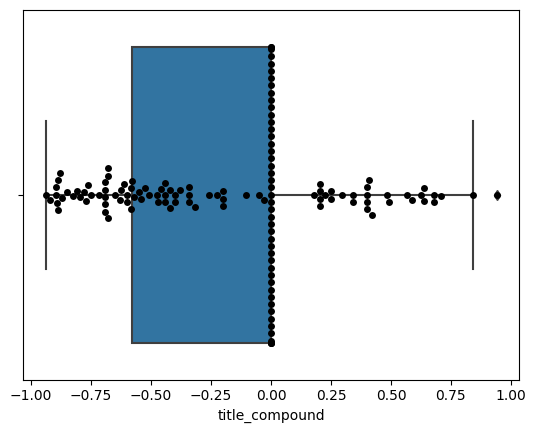

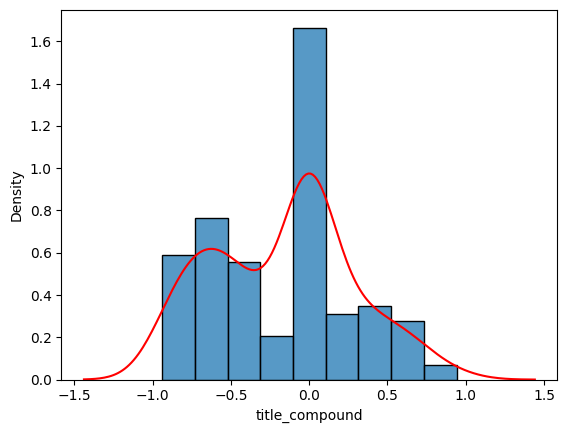

In [1012]:
# Creating a box plot for the title_sentiment column

sns.boxplot(x=df_posts['title_compound'])

# Adding a swarm plot to show individual data points

sns.swarmplot(x=df_posts['title_compound'], color='black')

# Displaying the box plot with the swarm plot

plt.show()



# Creating a histogram for the title_sentiment column

sns.histplot(df_posts['title_compound'], kde=False, stat='density')

# Adding a kernel density estimate (KDE) plot to the histogram

sns.kdeplot(df_posts['title_compound'], color='r')

# Displaying the histogram with the KDE plot

plt.show()

### Visualizations of the body of the post 

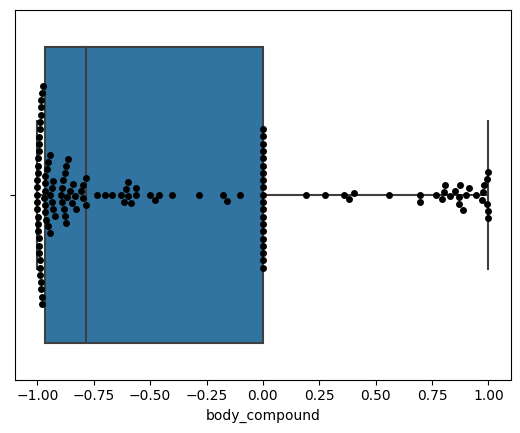

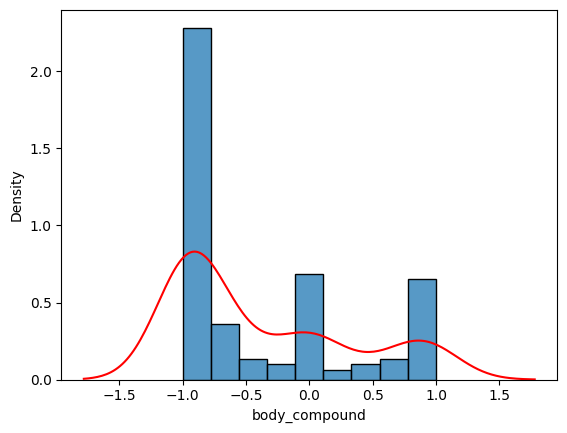

In [1013]:
# Creating a box plot for the title_sentiment column

sns.boxplot(x=df_posts['body_compound'])

# Adding a swarm plot to show individual data points

sns.swarmplot(x=df_posts['body_compound'], color='black')

# Displaying the box plot with the swarm plot

plt.show()



# Creating a histogram for the title_sentiment column

sns.histplot(df_posts['body_compound'], kde=False, stat='density')

# Adding a kernel density estimate (KDE) plot to the histogram

sns.kdeplot(df_posts['body_compound'], color='r')

# Displaying the histogram with the KDE plot

plt.show()

## Preliminary analysis

The distribution of both the body and the title of the posts is heavily leaning towards the left side, which means negative sentiments. This is also noticeable in the normal curve shape, with a very clear positive skew towards negative sentiments in the posts' body sentiment scores.

### Overviewing basic statistical data

Below, I will conduct some basic statistical review of the sample, including average, percentiles, and standard deviation.

In [1014]:
# Calculate statistics for body sentiment

body_sentiment_mean = df_posts['body_compound'].mean()

body_sentiment_mode = df_posts['body_compound'].mode().iloc[0]

body_sentiment_median = df_posts['body_compound'].median()

body_sentiment_percentiles = np.percentile(df_posts['body_compound'], [25, 50, 75])

body_sentiment_std = df_posts['body_compound'].std()



# Print out the results for body sentiment

print('Body Sentiment Statistics:')

print(f'  Mean: {body_sentiment_mean}')

print(f'  Mode: {body_sentiment_mode}')

print(f'  Median: {body_sentiment_median}')

print(f'  Percentiles: {body_sentiment_percentiles}')

print(f'  Standard Deviation: {body_sentiment_std}')

print(f'  Total Samples: {len(df_posts["body_compound"])}')



# Calculate statistics for title sentiment

title_sentiment_mean = df_posts['title_compound'].mean()

title_sentiment_mode = df_posts['title_compound'].mode().iloc[0]

title_sentiment_median = df_posts['title_compound'].median()

title_sentiment_percentiles = np.percentile(df_posts['title_compound'], [25, 50, 75])

title_sentiment_std = df_posts['title_compound'].std()



# Print out the results for title sentiment

print('Title Sentiment Statistics:')

print(f'  Mean: {title_sentiment_mean}')

print(f'  Mode: {title_sentiment_mode}')

print(f'  Median: {title_sentiment_median}')

print(f'  Percentiles: {title_sentiment_percentiles}')

print(f'  Standard Deviation: {title_sentiment_std}')

print(f'  Total Samples: {len(df_posts["title_compound"])}')

Body Sentiment Statistics:
  Mean: -0.3805166666666667
  Mode: 0.0
  Median: -0.7838
  Percentiles: [-0.966375 -0.7838    0.      ]
  Standard Deviation: 0.6961507429238867
  Total Samples: 138
Title Sentiment Statistics:
  Mean: -0.16779565217391304
  Mode: 0.0
  Median: 0.0
  Percentiles: [-0.57805  0.       0.     ]
  Standard Deviation: 0.44640129811533996
  Total Samples: 138


## Reviewing basic statistical findings

In both the title and the body sentiment score, the mode is zero. It happens because many posts scored neutral. However, the standard deviation indicates that this sample has a strong variation in both the body and the title. Also, analyzing the percentiles, the data suggests a predominant inclination to negative sentiments, in particular in the body of the posts.

### Visualizing the distribution of the sentiment scores

Below, I will plot the distribution of the sentiment scores in the title and the body of the posts.

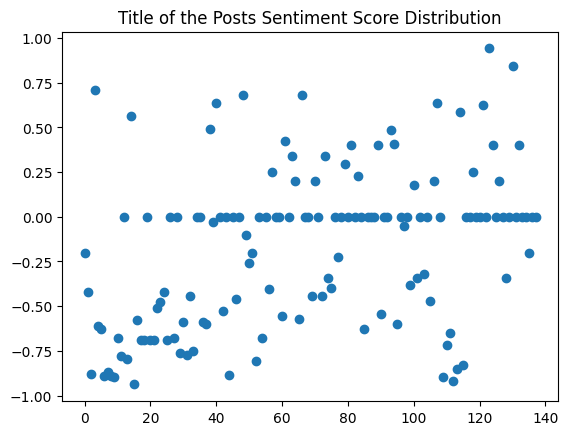

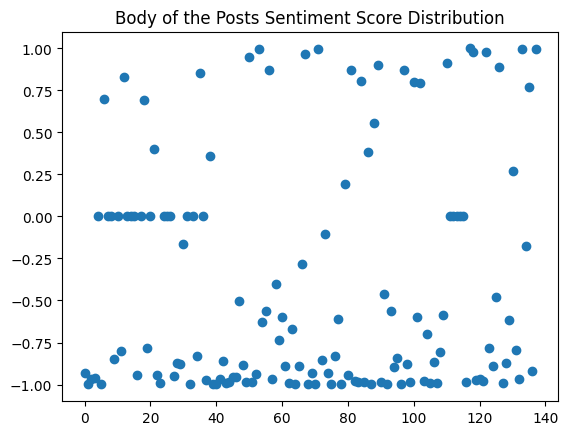

In [1015]:
# Creating a scatter plot to show the distribution of body of the posts' sentiment scores

plt.scatter(range(len(df_posts)), df_posts['title_compound'])

plt.title('Title of the Posts Sentiment Score Distribution')

plt.show()



# Creating a scatter plot to show the distribution of body of the posts' sentiment scores

plt.scatter(range(len(df_posts)), df_posts['body_compound'])

plt.title('Body of the Posts Sentiment Score Distribution')

plt.show()


### What the data tell us

The distribution of the sentiment scores in the title and the body of the posts is very similar, although the body of the posts has the strongest negative inclination. Both are heavily leaning towards the bottom part, which means negative sentiments. This is also noticeable in the normal curve shape, with a very clear positive skew towards negative sentiments in the posts' body sentiment scores.

## Splitting the data in categories

In [1016]:
# Define the sentiment intensity thresholds

low_threshold = 0.3

moderate_threshold = 0.6

high_threshold = 0.9



# Initialize the sentiment intensity counts for title sentiment

title_positive_low_count = 0

title_positive_moderate_count = 0

title_positive_high_count = 0

title_neutral_count = 0

title_negative_low_count = 0

title_negative_moderate_count = 0

title_negative_high_count = 0



# Initialize the sentiment intensity counts for body sentiment

body_positive_low_count = 0

body_positive_moderate_count = 0

body_positive_high_count = 0

body_neutral_count = 0

body_negative_low_count = 0

body_negative_moderate_count = 0

body_negative_high_count = 0



# Iterate over the rows in the DataFrame and update the sentiment intensity counts for title and body sentiment

for index, row in df_posts.iterrows():

    # Update the title sentiment intensity counts

    title_sentiment_score = row['title_compound']

    if title_sentiment_score > high_threshold:

        title_positive_high_count += 1

    elif title_sentiment_score > moderate_threshold:

        title_positive_moderate_count += 1

    elif title_sentiment_score > low_threshold:

        title_positive_low_count += 1

    elif title_sentiment_score < -high_threshold:

        title_negative_high_count += 1

    elif title_sentiment_score < -moderate_threshold:

        title_negative_moderate_count += 1

    elif title_sentiment_score < -low_threshold:

        title_negative_low_count += 1

    else:

        title_neutral_count += 1



    # Update the body sentiment intensity counts

    body_sentiment_score = row['body_compound']

    if body_sentiment_score > high_threshold:

        body_positive_high_count += 1

    elif body_sentiment_score > moderate_threshold:

        body_positive_moderate_count += 1

    elif body_sentiment_score > low_threshold:

        body_positive_low_count += 1

    elif body_sentiment_score < -high_threshold:

        body_negative_high_count += 1

    elif body_sentiment_score < -moderate_threshold:

        body_negative_moderate_count += 1

    elif body_sentiment_score < -low_threshold:

        body_negative_low_count += 1

    else:

        body_neutral_count += 1



# Print out the results for title sentiment intensity counts

print('Distribution of Title Sentiment Scores by Sentiment Intensity Range:')

print('Positive (low):', title_positive_low_count)

print('Positive (moderate):', title_positive_moderate_count)

print('Positive (high):', title_positive_high_count)

print('Neutral:', title_neutral_count)

print('Negative (low):', title_negative_low_count)

print('Negative (moderate):', title_negative_moderate_count)

print('Negative (high):', title_negative_high_count)

print('\n')



# Print out the results for body sentiment intensity counts

print('Distribution of Body Sentiment Scores by Sentiment Intensity Range:')

print('Positive (low):', body_positive_low_count)

print('Positive (moderate):', body_positive_moderate_count)

print('Positive (high):', body_positive_high_count)

print('Neutral:', body_neutral_count)

print('Negative (low):', body_negative_low_count)

print('Negative (moderate):', body_negative_moderate_count)

print('Negative (high):', body_negative_high_count)

Distribution of Title Sentiment Scores by Sentiment Intensity Range:
Positive (low): 12
Positive (moderate): 7
Positive (high): 1
Neutral: 63
Negative (low): 25
Negative (moderate): 28
Negative (high): 2


Distribution of Body Sentiment Scores by Sentiment Intensity Range:
Positive (low): 4
Positive (moderate): 12
Positive (high): 11
Neutral: 26
Negative (low): 9
Negative (moderate): 27
Negative (high): 49


## Visualizing the distribution of the sentiment scores by category

To offer a better visualization, we can use the seaborn library to plot the distribution of the sentiment scores by category in a pie chart.

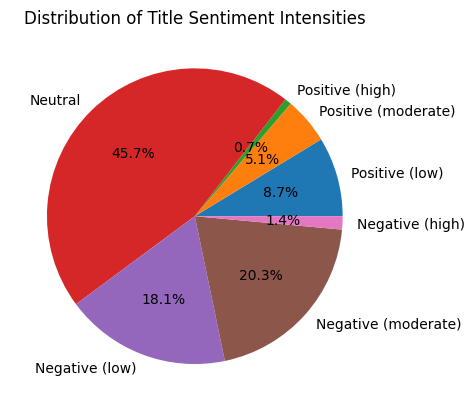

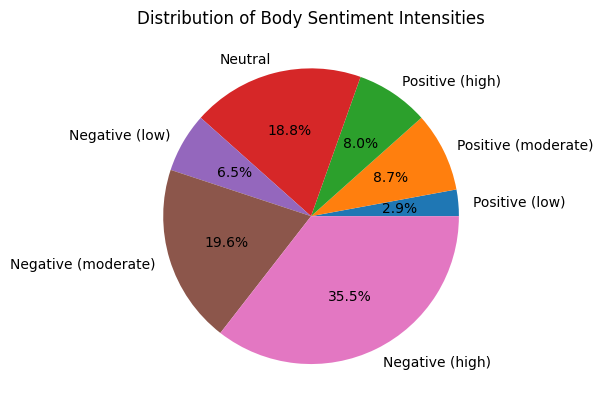

In [1017]:
# Create data and labels for title sentiment intensity pie chart

title_data = [title_positive_low_count, title_positive_moderate_count, title_positive_high_count, title_neutral_count, title_negative_low_count, title_negative_moderate_count, title_negative_high_count]

title_labels = ['Positive (low)', 'Positive (moderate)', 'Positive (high)', 'Neutral', 'Negative (low)', 'Negative (moderate)', 'Negative (high)']



# Create a pie chart for title sentiment intensity counts

plt.pie(title_data, labels=title_labels, autopct='%1.1f%%')

plt.title('Distribution of Title Sentiment Intensities')

plt.show()



# Create data and labels for body sentiment intensity pie chart

body_data = [body_positive_low_count, body_positive_moderate_count, body_positive_high_count, body_neutral_count, body_negative_low_count, body_negative_moderate_count, body_negative_high_count]

body_labels = ['Positive (low)', 'Positive (moderate)', 'Positive (high)', 'Neutral', 'Negative (low)', 'Negative (moderate)', 'Negative (high)']



# Create a pie chart for body sentiment intensity counts

plt.pie(body_data, labels=body_labels, autopct='%1.1f%%')

plt.title('Distribution of Body Sentiment Intensities')

plt.show()

### Testing correlation between title and body of the posts

The Pearson correlation test indicated a coefficient of -0.001, which suggests no linear relationship. In other words, the tests results corroborates the hypothesis that title and body sentiment score do not predict each other.

In [1018]:
# Calculate the Pearson correlation coefficient between title_sentiment and body_sentiment
corr, _ = pearsonr(df_posts['title_compound'], df_posts['body_compound'])


# Print out the result
print(f'Pearson correlation coefficient: {corr:.3f}')

Pearson correlation coefficient: -0.001


### Looking for significant differences between the score of the body and the title of the posts

The T-test score suggests that the average of the two groups is 3.020 standard deviations apart from each other that are considered statistically significant in an alpha level of 5%. That is, considering the p-value the data suggests that are significant statistical differences between the two groups. T-tests can be used to test, for instance, if an intervention lead to a significant differences between the experiment and the control group. In this case, I used this T-test to check if the sentiment score of title and body content could be used interchangeably. The results do not support this hypothesis. It means that the title score could not be taken as representative of the body post score, and vice-versa.

In [1019]:
# Perform a paired t-test
t_stat, p_val = ttest_rel(df_posts['title_compound'], df_posts['body_compound'])

# Print out the results
print(f't-statistic: {t_stat:.3f}')
print(f'p-value: {p_val:.3f}')

t-statistic: 3.020
p-value: 0.003


## Exploring the upvotes and downvotes of the posts



### Exploring the top 10 most upvoted posts

In [1020]:
# Sort the DataFrame by score in descending order
df_sorted = df_posts.sort_values('score', ascending=False)

# Print the top 10 highest scoring posts
print('Top 10 highest scoring posts:')
for i, row in df_sorted.head(10).iterrows():
    print(f'{i}: Score {row["score"]}')
    print(f'Title: {row["title"]}')
    print()


Top 10 highest scoring posts:
118: Score 762
Title: A comprehensive and summarical list of all Crusader Kings Two DLCs.

12: Score 743
Title: A conversation with my marshal (2)

4: Score 292
Title: Got my first immortal character (650 hours) during an Aztec rape of my empire!

41: Score 284
Title: The single coolest dynasty in the game: The House of Ceuta (Qutids)

38: Score 229
Title: Anyone else become extremely good at history and geography due to CK2?

50: Score 203
Title: AAR: Tywin Lannister Did Nothing Wrong or: How I Learned to Stop Worrying and Rationalize Genocide

3: Score 182
Title: good lord do the devs know the limits of compassion

10: Score 166
Title: The King of Scotland's only daughter claimed I raped her

1: Score 146
Title: It pains me how unpolished this game is

112: Score 133
Title: My Marshal is demanding to be imprisoned for raping his newborn daughter... who apparently could be lying



### Exploring the top 10 most downvoted posts

The relevance of downvotes seemed to be very small in this sample of data. 

The variable score contains the number of upvotes minus the number of downvotes.

In [1021]:
# Sort the DataFrame by score in descending order
df_sorted = df_posts.sort_values('downs', ascending=False)

# Print the top 10 highest scoring posts
print('Top 10 highest scoring posts:')
for i, row in df_sorted.head(10).iterrows():
    print(f'{i}: Score {row["score"]}')
    print(f'Title: {row["title"]}')
    print()


Top 10 highest scoring posts:
0: Score 0
Title: Feudal vs Tribal

94: Score 2
Title: Trying to take over Sweden as the Republic of Gotland, not going so well.

88: Score 1
Title: Frisia nerf? When did this happen?

89: Score 2
Title: I can't arrange any marriages or betrothals suddenly. Help?

90: Score 1
Title: How the fuck do you even live as Karen.

91: Score 0
Title: Shower Thought I Had

92: Score 4
Title: Zunist Run Update 2: Elective Bugaloo

93: Score 2
Title: [Problem] My viking ships are heaving with gold but are stuck in the Rhine. Help me please.

95: Score 4
Title: Torture mods?

103: Score 0
Title: Can we please ban Anime Portraits from this subreddit? Every time someone posts it I throw up a little in my mouth.



## Testing correlations between score given by the users (upvotes - downvotes) and compound score of the sentiment analysis

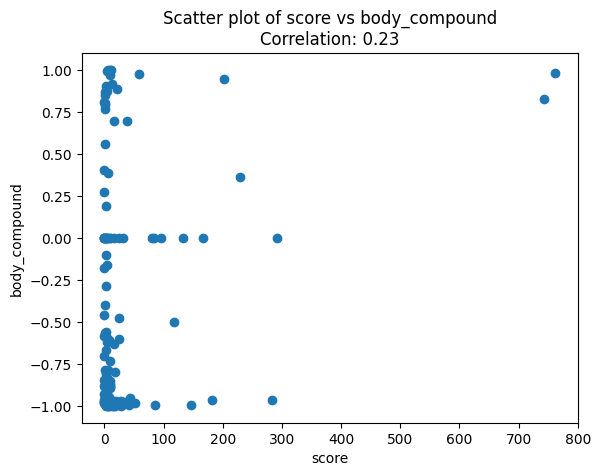

In [1022]:
# Create a scatter plot between score and body_compound for all data
plt.scatter(df_posts['score'], df_posts['body_compound'])

# Calculate the correlation coefficient
correlation_coefficient = df_posts['score'].corr(df_posts['body_compound'])

# Set the axis labels and title
plt.xlabel('score')
plt.ylabel('body_compound')
plt.title(f'Scatter plot of score vs body_compound\nCorrelation: {correlation_coefficient:.2f}')

# Show the plot
plt.show()

### Correcting the score by removing the null ones

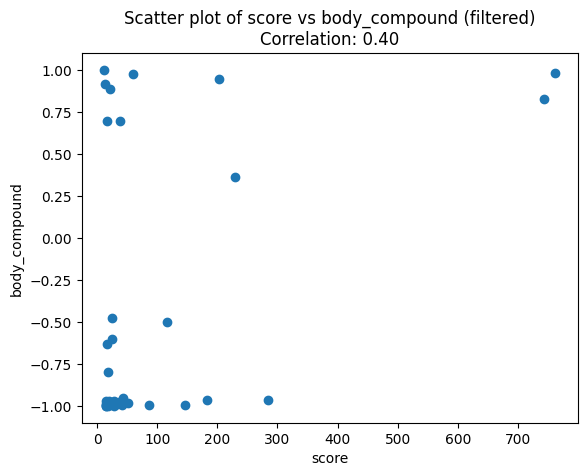

In [1023]:
# Filter the data to include only posts with a score greater than 10 and a non-zero body_compound score
df_filtered = df_posts.loc[(df_posts['score'] > 10) & (df_posts['body_compound'] != 0)]

# Create a scatter plot between score and body_compound for filtered data
plt.scatter(df_filtered['score'], df_filtered['body_compound'])

# Calculate the correlation coefficient
correlation_coefficient = df_filtered['score'].corr(df_filtered['body_compound'])

# Set the axis labels and title
plt.xlabel('score')
plt.ylabel('body_compound')
plt.title(f'Scatter plot of score vs body_compound (filtered)\nCorrelation: {correlation_coefficient:.2f}')

# Show the plot
plt.show()

### Interpretation

The Pearson correlation indicated a coefficient of 0.40, which suggests a moderate positive linear relationship. Although the correlation is positively moderate, it has plenty of outliers and should not be taken as a linear explanation of the phenomenon. 

## Using sentiment analysis to track the words most associated with positive and negative sentiments in the data sample

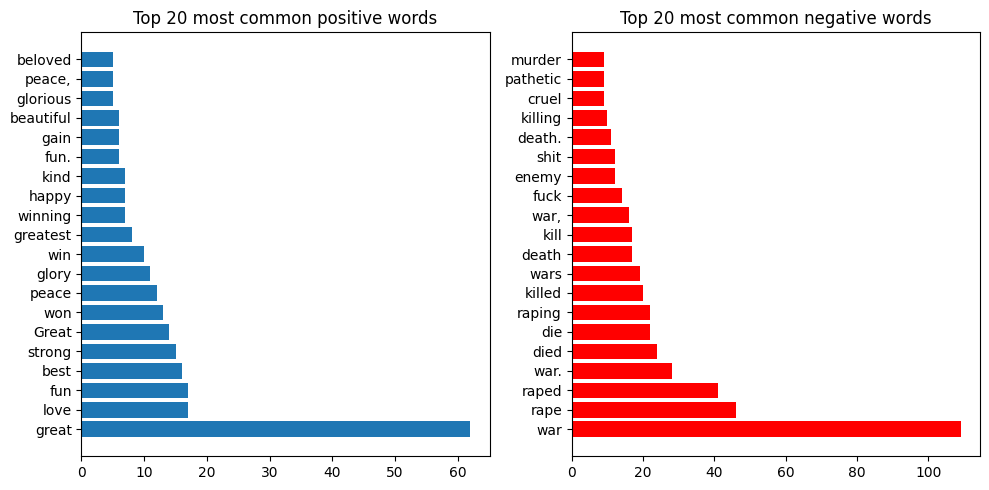

In [1024]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Read the CSV file
df = pd.read_csv('posts.csv')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Create a list to store positive and negative words
pos_words = []
neg_words = []

# Iterate over the body text of each post
for body in df['body']:
    # Check if body is not NaN
    if pd.notna(body):
        # Tokenize the body text
        tokens = body.split()
        # Iterate over each token
        for token in tokens:
            # Get the sentiment scores for the token
            scores = sid.polarity_scores(token)
            # Check if the token is positive or negative
            if scores['compound'] > 0.5:
                pos_words.append(token)
            elif scores['compound'] < -0.5:
                neg_words.append(token)

# Count the occurrences of each positive and negative word
pos_word_counts = pd.Series(pos_words).value_counts().head(20)
neg_word_counts = pd.Series(neg_words).value_counts().head(20)

# Create horizontal bar plots to visualize the top 20 most common positive and negative words
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.barh(pos_word_counts.index, pos_word_counts.values)
ax1.set_title('Top 20 most common positive words')
ax2.barh(neg_word_counts.index, neg_word_counts.values, color='red')
ax2.set_title('Top 20 most common negative words')
plt.tight_layout()
plt.show()

## Exploring the data in the comments

c:\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


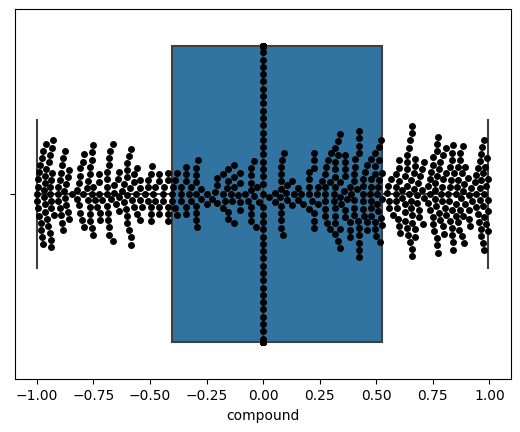

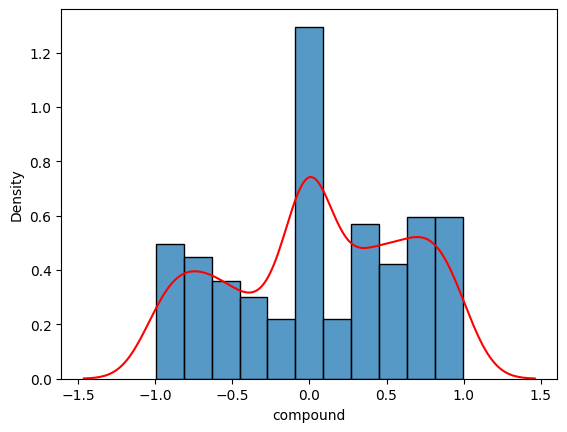

Body Sentiment Statistics:
  Mean: 0.057639233038348094
  Mode: 0.0
  Median: 0.0
  Percentiles: [-0.40085  0.       0.5264 ]
  Standard Deviation: 0.5731386092651848
  Total Samples: 678


In [1025]:
# Creating a box plot for the title_sentiment column

sns.boxplot(x=df_comments['compound'])

# Adding a swarm plot to show individual data points

sns.swarmplot(x=df_comments['compound'], color='black')

# Displaying the box plot with the swarm plot

plt.show()

# Creating a histogram for the title_sentiment column

sns.histplot(df_comments['compound'], kde=False, stat='density')

# Adding a kernel density estimate (KDE) plot to the histogram

sns.kdeplot(df_comments['compound'], color='r')

# Displaying the histogram with the KDE plot

plt.show()


# Calculate statistics for comments sentiment
comments_sentiment_mean = df_comments['compound'].mean()

comments_sentiment_mode = df_comments['compound'].mode().iloc[0]

comments_sentiment_median = df_comments['compound'].median()

comments_sentiment_percentiles = np.percentile(df_comments['compound'], [25, 50, 75])

comments_sentiment_std = df_comments['compound'].std()


# Print the statistics
print('Body Sentiment Statistics:')

print(f'  Mean: {comments_sentiment_mean}')

print(f'  Mode: {comments_sentiment_mode}')

print(f'  Median: {comments_sentiment_median}')

print(f'  Percentiles: {comments_sentiment_percentiles}')

print(f'  Standard Deviation: {comments_sentiment_std}')

print(f'  Total Samples: {len(df_comments["compound"])}')


### Preliminary interpretation

The comments follow a normal bell shape and do not indicate a strong skew to any of the sides. The mode is zero, which means that the majority of the comments scored neutral. The standard deviation indicates that this sample has a strong variation in the comments.

### Testing correlations between comments and upvotes

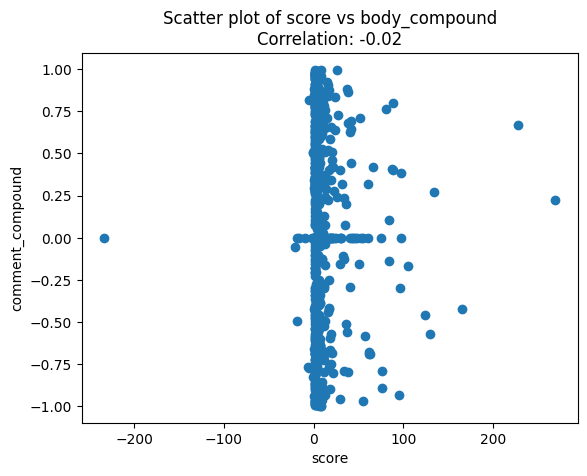

In [1026]:
# Create a scatter plot between score and body_compound for all data
plt.scatter(df_comments['score'], df_comments['compound'])

# Calculate the correlation coefficient
correlation_coefficient = df_comments['score'].corr(df_comments['compound'])

# Set the axis labels and title
plt.xlabel('score')
plt.ylabel('comment_compound')
plt.title(f'Scatter plot of score vs body_compound\nCorrelation: {correlation_coefficient:.2f}')

# Show the plot
plt.show()

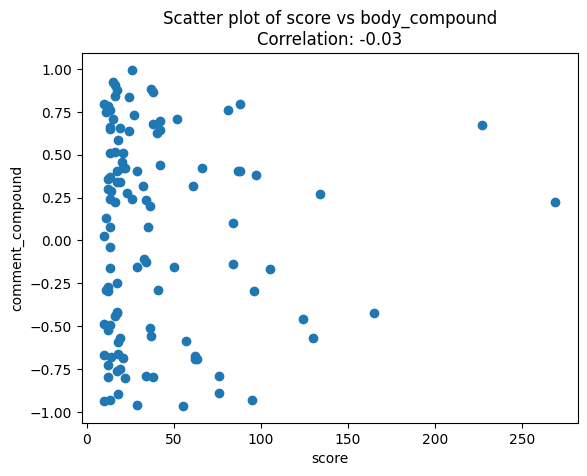

In [1027]:
# Filter the data to exclude scores less than 10 and compounds equal to 0
filtered_df = df_comments[(df_comments['score'] >= 10) & (df_comments['compound'] != 0)]

# Create a scatter plot between score and body_compound for filtered data
plt.scatter(filtered_df['score'], filtered_df['compound'])

# Calculate the correlation coefficient
correlation_coefficient = filtered_df['score'].corr(filtered_df['compound'])

# Set the axis labels and title
plt.xlabel('score')
plt.ylabel('comment_compound')
plt.title(f'Scatter plot of score vs body_compound\nCorrelation: {correlation_coefficient:.2f}')

# Show the plot
plt.show()

### Interpretation

The analysis of comments does not corroborate any specific trend in the data, even if excluding the data points with little significance. 

In [1028]:
# Sort the DataFrame by score in ascending order
sorted_df = df_comments.sort_values(by='score')

# Select the comments and score columns and display the top n most downvoted comments
n = 10
most_downvoted_comments = sorted_df[['comment', 'score']].head(n)

# Display the most downvoted comments and their scores
print(f'The {n} most downvoted comments and their scores are:')
print(most_downvoted_comments)

The 10 most downvoted comments and their scores are:
                                               comment  score
93                                           [removed]   -233
306  Tywin's an inexcusably evil bastard and ASoIaF...    -21
169  this is just genius.\ni srsly thought here and...    -19
92   This is why I need masculism\n\nEDIT: these do...    -18
305                                                 K.    -16
164                                       /r/nocontext    -10
594  *summary of dlc's*\n\n**THEY ALL SUCK!!!**\n\n...     -6
222  Well, i already it maknly. But regarding polit...     -5
292  What kind of idiot do you have to be to send y...     -5
139                               /r/nocontext baiting     -2


## Visualizing the highest and lowest scoring posts

### Most negative Posts' bodies according to VADER sentiment analysis

In [1029]:
# Select the top 20 most negative posts based on the body compound score
top_20_negative = df_posts.nsmallest(20, 'body_compound')

# Print out the information for each of the top 20 most negative posts
for index, row in top_20_negative.iterrows():
    print(f"Title: {row['title']}")
    print(f"Body Compound Score: {row['body_compound']}")
    print(f"Score: {row['score']}\n")

Title: [Succession Game #2] Round 9 - King Oswulf d'Isigny
Body Compound Score: -0.9997
Score: 18

Title: [Succession Game #2] Round 4 - King Henry I d'Isigny
Body Compound Score: -0.9997
Score: 28

Title: A little CK3 rage for you all, enjoy the schadenfreude
Body Compound Score: -0.9995
Score: 15

Title: A tale of treachery, bugs and general bullshittery.
Body Compound Score: -0.9995
Score: 6

Title: The Rise of Sweden - The Reign Of King Alfr
Body Compound Score: -0.9994
Score: 6

Title: Here is what I *love* about CK2
Body Compound Score: -0.9989
Score: 14

Title: This game is crazy!
Body Compound Score: -0.9979
Score: 9

Title: ck3 criticism
Body Compound Score: -0.9975
Score: 3

Title: [Game #6, Round 7] - King Belasko II
Body Compound Score: -0.9967
Score: 14

Title: Zunist Run Update 2: Elective Bugaloo
Body Compound Score: -0.9961
Score: 4

Title: Some memories from my first campaign
Body Compound Score: -0.995
Score: 3

Title: It pains me how unpolished this game is
Body Comp

### Most positive Posts' bodies according to VADER sentiment analysis

In [1030]:
# Select the top 20 most positive posts based on the body compound score
top_20_positive = df_posts.nlargest(20, 'body_compound')

# Print out the information for each of the top 20 most positive posts
for index, row in top_20_positive.iterrows():
    print(f"Title: {row['title']}")
    print(f"Body Compound Score: {row['body_compound']}")
    print(f"Score: {row['score']}\n")


Title: The rebirth of Egypt
Body Compound Score: 0.9994
Score: 12

Title: [Game #5, Round #6] - King Belasko
Body Compound Score: 0.997
Score: 7

Title: The story of Emperor John "The Avatar of Jesus"/Imparat Ioan "Avatarul lui Iisus"
Body Compound Score: 0.9964
Score: 10

Title: Some tips and random thoughts for a Rurik ToG start and non-Norse pagans in general (long)
Body Compound Score: 0.995
Score: 6

Title: The Paradoxical Millennium Needs You!
Body Compound Score: 0.9944
Score: 4

Title: A comprehensive and summarical list of all Crusader Kings Two DLCs.
Body Compound Score: 0.9784
Score: 762

Title: [Game 3, Round 1] - Duke Ishanadl Abdeddit
Body Compound Score: 0.9768
Score: 59

Title: From Norway to Venice. The Mercantile Vikings
Body Compound Score: 0.9695
Score: 9

Title: AAR: Tywin Lannister Did Nothing Wrong or: How I Learned to Stop Worrying and Rationalize Genocide
Body Compound Score: 0.9463
Score: 203

Title: Why is my wife okay with me raping women but raises a stink 

## Final considerations

Exploring Reddit data using sentiment analysis in the community of CrusaderKings revealed that titles and comments offer a less valuable overview of the content of the posts. The best textual source to picture the sentiment of the posts is the body of the posts. The analysis of the body of the posts revealed that the majority of the posts are leaning towards negative sentiments. The analysis of the comments did not reveal any specific trend in the data. Also, the analysis of the comments did not reveal any specific trend in the data. 

### Limitations

The limited sample data obtained through the search of the keywords rape and raping led to a smaller amount of sample than the usually needed to perform natural language processing techniques. Also, the use of the VADER sentiment analysis tool is a limitation of this study. Although VADER is a powerful tool, it is still not the ideal tool to process human language and has its limitations. For instance, it does not consider the context of the words, like when people use irony, which can lead to misinterpretations. Also, the preliminary analysis of the comments did not reveal any specific trend in the data.

Although VADER is a library for sentiment analysis with social media textual content analysis as the purpose of its very design, the content found within the sample also represents a challenge. In the CrusaderKings subreddit, users often mixed contexts of sexual violence with celebratory words. One of the posts had the title "What's the most depraved mod? I want rape, sexual slavery, sadism and everything else you have to offer!". It essentially celebrates many forms of violence. Although its title had a very negative compound score (-0.88), its body compound score had a moderate-high positive score (0.69). 

Below, the content of the body 

"Hello guys!

No need to talk around the bush: In games like these that give me so many options I want to go completely nuts in terms of morality!

So, what mods are there out there that you can recommend which feature all these things that would induce my employer to fire me and my family to disown me should they ever find out I played it?

Edit: Thanks a lot for all the help! I think I'm gonna stick with the GoT mod for now since the Dark World reborn seems to have some balancing issues and I'm really not a fan of animals. "

Even when read by a human being, this piece of textual information transmits a sense of thrilling and enthusiasm about sexual violence and other forms of violence. This is also the case of other posts related to sexual violence on this subreddit, in which users use celebratory textual productions to talk about violence. As a result, a qualitative analysis of the posts along with the use of sentiment analysis could offer better contextualization of the use of language. 